## 1.  Regression Tree

Regression Trees are a class of **tree-based supervised learning algorithms** designed for **continuous-valued prediction tasks**.  
They belong to the broader family of **Decision Trees**, but instead of predicting class labels (as in classification trees), regression trees predict **numerical outcomes**.

A regression tree works by **recursively partitioning the feature space** into disjoint regions and assigning a constant prediction value to each region, typically the **mean of the target values** within that region.

---

### 1.1 Model Structure

A regression tree consists of:

- **Internal nodes**: represent decision rules of the form
    
    $$\large x_j \leq t$$
    
    where $\large x_j$​ is a feature and ttt is a threshold.
    
- **Branches**: outcomes of the decision rule (left / right).
    
- **Leaf nodes**: store a constant prediction value (the average target value of samples in that leaf).
    

Each path from the root to a leaf corresponds to a **sequence of decision rules** that defines a region in the feature space.

---

### 1.2 Splitting Criterion (Mean Squared Error)

To decide the best split at each node, regression trees typically use **Mean Squared Error (MSE)** as the impurity measure.

For a node containing target values $\large y_1, \dots, y_n​$, the impurity is defined as:

$$\large \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2$$

where $\large \bar{y}$ is the mean of the target values in the node.

For a candidate split that divides the data into a left child $\large L$ and right child $\large R$, the **weighted impurity after splitting** is:

$$\large \text{MSE}_{\text{split}} = \frac{|L|}{n} \text{MSE}(L) + \frac{|R|}{n} \text{MSE}(R)$$

The algorithm selects the split that **maximizes the reduction in impurity**:

$$\large \Delta \text{MSE} = \text{MSE}_{\text{parent}} - \text{MSE}_{\text{split}}$$
---

### 1.3 Recursive Tree Construction

The regression tree is built using a **top-down greedy strategy**:

1. Start from the root node containing all training samples.
    
2. For each candidate feature and threshold, evaluate the impurity reduction.
    
3. Select the split with the largest impurity reduction.
    
4. Recursively apply the same procedure to the left and right child nodes.
    

The recursion stops when one of the following conditions is met:

- The maximum tree depth is reached.
    
- The number of samples in a node is smaller than a predefined threshold.
    
- Further splits do not reduce impurity.
    

---

### 1.4 Key Hyperparameters

Several hyperparameters control the complexity of a regression tree:

- **`max_depth`**: Maximum depth of the tree.
    
- **`min_samples_split`**: Minimum number of samples required to split a node.
    
- **`min_samples_leaf`**: Minimum number of samples required at a leaf node.
    
- **`max_features`**: Number of features considered when searching for the best split.
    

These parameters help balance the trade-off between **model flexibility** and **overfitting**.

---

### 1.5 Strengths and Limitations

**Advantages:**

- Naturally captures **nonlinear relationships**.
    
- Requires minimal data preprocessing.
    
- Easy to interpret via decision rules.
    

**Limitations:**

- Prone to **overfitting** if not properly regularized.
    
- Small changes in data can lead to different tree structures.
    
- Individual trees may have limited predictive accuracy compared to ensemble methods.
    

---

### 1.6 Motivation for This Example

In this example, we apply a regression tree to a real-world dataset to:

- Demonstrate how tree-based regression models partition the feature space.
    
- Analyze the impact of key hyperparameters on model behavior.
    
- Provide intuition for why regression trees serve as building blocks for more advanced ensemble methods such as **Random Forests** and **Gradient Boosting**.

## 2. Dataset Description

In this example, we use a **real-world regression dataset** to demonstrate the behavior of a regression tree model.

The dataset contains multiple numerical input features describing the characteristics of each observation, along with a **continuous target variable**.  
The goal of the regression task is to learn a mapping from the input features to the target value.

This dataset is well suited for regression trees because:

- The target variable is **continuous**
    
- The relationship between features and target is **potentially nonlinear**
    
- No strong parametric assumptions (e.g., linearity) are required
    

---

### 2.1 Features and Target Variable

Let the dataset be denoted as:

$$\large \mathcal{D} = \{(x_i, y_i)\}_{i=1}^{n}$$

where:

- $\large x_i \in \mathbb{R}^p$ is a vector of input features
    
- $\large y_i \in \mathbb{R}$ is the continuous target value
    

Each row in the dataset corresponds to one observation, and each column represents either:

- an **input feature**, or
    
- the **regression target**
    

In this notebook, the regression tree will be trained to predict the target variable based on the provided feature set.

---

### 2.2 Learning Objective

The objective of the regression tree model is to approximate the unknown function:

$$\large y = f(x)$$

by recursively partitioning the feature space and assigning a constant prediction value to each region.

The predicted value for any sample is the **mean target value** of the leaf node into which the sample falls.

## 3. Data Loading

In this section, we load the dataset from a CSV file and perform basic preprocessing steps required for model training.

We assume that:

- The dataset has already been cleaned.
    
- All features are numerical.
    
- The target variable is stored in a single column.

In [15]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

# Load California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

df.head()# Select one feature for visualization
X = df[["MedInc"]].values
y = df["MedHouseVal"].values

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


# Column names
df.columns

# Summary information
df.info()



Feature matrix shape: (20640, 1)
Target vector shape: (20640,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Next, we separate the dataset into:

- **Feature matrix** XXX
    
- **Target vector** yyy
    

Assuming the target variable is stored in a column named **`target`**

In [17]:
# Select one feature for visualization
X = df[["MedInc"]].values
y = df["MedHouseVal"].values

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (20640, 1)
Target vector shape: (20640,)


To evaluate the generalization performance of the regression tree, we split the data into training and testing sets.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 16512
Testing samples: 4128


## 4. Regression Tree Model Training

In this section, we train a regression tree model using the custom implementation developed in the rice_ml package.
The goal is to learn a nonlinear mapping from the input feature(s) to the continuous target variable.

Unlike linear regression models, regression trees approximate the target function using piecewise constant predictions, making them well suited for capturing nonlinear patterns.

Initialize a regression tree regressor with a limited maximum depth to avoid overfitting and to improve interpretability.

In [19]:
from rice_ml.regression_trees import RegressionTreeRegressor

# Initialize regression tree model
tree = RegressionTreeRegressor(
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=5,
    random_state=42
)

# Fit the model
tree.fit(X_train, y_train)

# Generate predictions
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)


To quantitatively evaluate model performance, we use **Mean Squared Error (MSE)** on both training and test sets.

$$\large \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [20]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE:     {test_mse:.4f}")


Training MSE: 0.6848
Test MSE:     0.7121


## 5. Visualization of Regression Tree Predictions

To better understand how the regression tree models the relationship between the input feature and the target variable, we visualize the model predictions alongside the original data.

Since this dataset contains a single numerical feature, the learned regression function can be visualized directly in two dimensions.

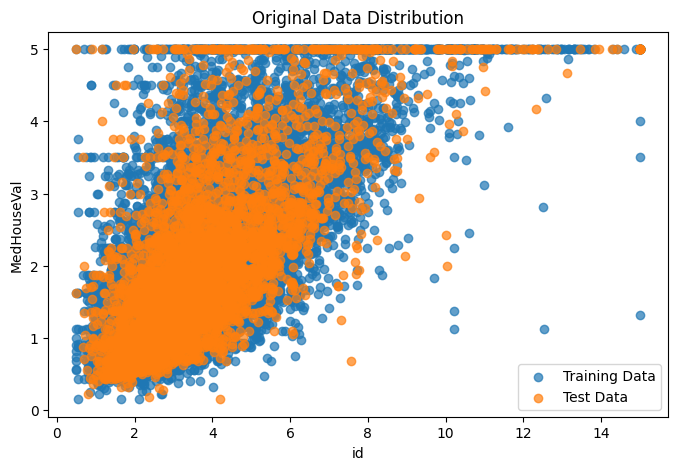

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X_train[:, 0], y_train, alpha=0.7, label="Training Data")
plt.scatter(X_test[:, 0], y_test, alpha=0.7, label="Test Data")
plt.xlabel("id")
plt.ylabel("MedHouseVal")
plt.title("Original Data Distribution")
plt.legend()
plt.show()


Regression trees approximate the target function using piecewise constant values.
To visualize this behavior, we generate predictions over a sorted range of input values.

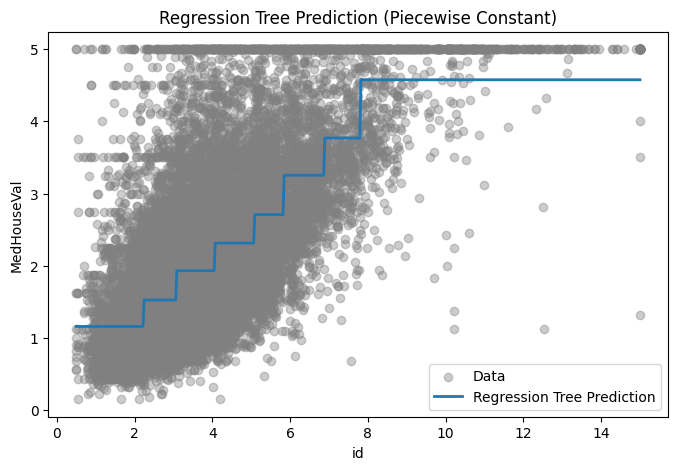

In [22]:
# Create a sorted grid of input values
X_grid = np.linspace(X[:, 0].min(), X[:, 0].max(), 500).reshape(-1, 1)

# Predict using the trained regression tree
y_grid_pred = tree.predict(X_grid)

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], y, color="gray", alpha=0.4, label="Data")
plt.plot(X_grid[:, 0], y_grid_pred, linewidth=2, label="Regression Tree Prediction")
plt.xlabel("id")
plt.ylabel("MedHouseVal")
plt.title("Regression Tree Prediction (Piecewise Constant)")
plt.legend()
plt.show()


The regression tree produces a piecewise constant prediction function by partitioning the feature space along the median income axis.
Each horizontal segment corresponds to a leaf node, where the predicted value is the average house value of samples within that interval.
The stepwise structure highlights the ability of regression trees to capture nonlinear relationships without assuming a parametric form.

## 6. Summary & Key Takeaways

In this example, we implemented and applied a **Regression Tree** model to a real-world housing dataset in order to understand its behavior, strengths, and limitations.

---

### 6.1 Key Observations

- Regression trees model the relationship between input features and a continuous target variable using **recursive binary splits**.
    
- The resulting prediction function is **piecewise constant**, where each constant segment corresponds to a leaf node in the tree.
    
- In the one-dimensional case, regression trees partition the feature axis into intervals defined by learned threshold values.
    

---

### 6.2 Model Behavior and Interpretability

- Unlike linear regression, regression trees **do not assume a linear relationship** between features and the target.
    
- The learned splits directly reveal how the model segments the feature space, making regression trees **highly interpretable**.
    
- Each prediction can be explained as the average target value of the samples within a specific region of the feature space.
    

---

### 6.3 Bias–Variance Considerations

- Regression trees are **high-variance models**: small changes in the training data may lead to different tree structures.
    
- Without proper regularization (e.g., limiting tree depth or minimum leaf size), regression trees may **overfit** the training data.
    
- Hyperparameters such as `max_depth` and `min_samples_leaf` play a crucial role in controlling model complexity and improving generalization.
    

---

### 6.4 Strengths and Limitations

**Strengths:**

- Capture nonlinear relationships naturally.
    
- Require minimal feature preprocessing.
    
- Produce transparent and interpretable decision rules.
    

**Limitations:**

- Piecewise constant predictions may lack smoothness.
    
- Sensitive to noise and data perturbations.
    
- Typically less accurate than ensemble methods when used alone.
    

---

### 6.5 Connection to Ensemble Methods

Regression trees serve as the **fundamental building blocks** for more powerful ensemble models such as:

- **Random Forests**, which reduce variance by averaging multiple trees trained on bootstrapped samples.
    
- **Gradient Boosting**, which improves predictive performance by sequentially fitting trees to correct residual errors.
    

These ensemble methods retain the interpretability and flexibility of individual trees while significantly improving robustness and accuracy.

---

### 6.6 Final Remarks

This example demonstrates how regression trees approximate complex relationships through adaptive partitioning of the feature space.  
While simple in structure, regression trees provide essential insights into nonlinear modeling and form the foundation of many state-of-the-art machine learning algorithms.